In [1]:
# !pip install PyPortfolioOpt

In [2]:
import requests
import pandas as pd
from datetime import datetime as dt

import matplotlib.pyplot as plt
plt.style.use('fast')

import warnings as wn
wn.filterwarnings('ignore')

from pypfopt import expected_returns, risk_models, EfficientFrontier
from pypfopt.discrete_allocation import get_latest_prices, DiscreteAllocation

In [3]:
# tickers = [
#     "GOOGL",    # Communication Services
#     "HD", "NKE", "MCD", "LOW", "TJX", "SBUX", "DG", "ORLY","AZO", "YUM", "TSCO",    # Consumer Discretionary
#     "PG", "KO", "PEP", "COST", "MDLZ", "HSY", "KR",    # Consumer Staples
#     "CVX", "XOM",    # Energy
#     "JPM", "SPGI", "NDAQ",    # Financials
#     "UNH", "JNJ", "LLY", "MRK", "ABBV", "PFE", "TMO", "DHR", "ABT", "ELV", "CI", "VRTX", "REGN", "HCA",    # Health Care
#     "DE", "CAT", "UPS", "UNP", "ETN", "WM", "CTAS", "ODFL", "PH", "TT",    # Industrials
#     "AAPL", "MSFT", "V", "MA", "AVGO", "ACN", "TXN", "ADP", "KLAC",    # Information Technology
#     "LIN",    # Materials
#     "EQIX", "VICI", "SBAC", "EXR", "MAA",    # Real Estate 
#     "AWK", "AWR", "NEE", "DUK", "SO", "ATO",    # Utilities
#     "SPY"    # S&P500 Index ETF
# ]

In [4]:
tickers = ["GOOGL", "AAPL", "MSFT", "AVGO", "TXN", "JPM", "JNJ", "UNH", "MRK", "PFE",
           "PG", "PEP", "KO", "K", "DG", "HD", "LOW", "ORLY", "AZO", "DE",
           "UNP", "AWK", "DUK", "SO", "ATO", "SPY"]

In [5]:
import aiohttp
import asyncio


headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
                       AppleWebKit/605.1.15 (KHTML, like Gecko) \
                       Chrome/100.0.4896.127 Safari/605.1.15 Firefox/100.0"
        }


def get_price_history(ticker, data):
    try:
        data = data["chart"]["result"][0]
    except:
        return
    lbls = [dt.fromtimestamp(i).date() for i in data["timestamp"]]
    rows = data["indicators"]["quote"][0]["close"]
    df = pd.DataFrame(data=rows, index=lbls, columns=[ticker])
    return df


async def get_response(ticker, session):
    url = f"https://query1.finance.yahoo.com/v8/finance/chart/{ticker}?range=30y&interval=1d"
    async with session.get(url, headers=headers) as response:
        data = await response.json()
        return get_price_history(ticker, data)


async def main(tickers):
    async with aiohttp.ClientSession() as session:
        return pd.concat(
            await asyncio.gather(*[asyncio.create_task(get_response(ticker, session)) for ticker in tickers]),
            axis=1
        )


df = await main(tickers)
df.dropna(inplace=True)
df

,GOOGL,AAPL,MSFT,AVGO,TXN,JPM,JNJ,UNH,MRK,PFE,...,LOW,ORLY,AZO,DE,UNP,AWK,DUK,SO,ATO,SPY
2009-11-13,14.315566,7.301786,29.629999,15.580000,25.440001,42.900002,61.430000,29.080000,31.583969,16.688805,...,21.850000,39.740002,143.669998,47.580002,31.775000,20.290001,48.119999,31.580000,28.250000,109.620003
2009-11-16,14.421421,7.379643,29.540001,16.010000,25.950001,43.040001,62.189999,29.150000,32.261452,17.020872,...,21.740000,39.939999,143.029999,48.910000,32.525002,20.420000,48.599998,31.900000,28.820000,111.209999
2009-11-17,14.451702,7.392857,30.000000,16.070000,25.870001,43.160000,62.169998,28.969999,32.719467,17.020872,...,21.480000,39.549999,142.619995,49.150002,32.980000,21.629999,48.570000,31.770000,29.100000,111.339996
2009-11-18,14.430681,7.355714,30.110001,16.030001,25.750000,43.380001,62.320000,28.870001,33.530533,17.258064,...,21.590000,39.450001,145.860001,51.459999,32.970001,21.430000,48.480000,31.719999,28.830000,111.269997
2009-11-19,14.339089,7.161071,29.780001,15.570000,24.879999,42.549999,62.430000,28.629999,33.711830,17.182163,...,21.490000,38.970001,145.830002,50.889999,32.334999,21.469999,48.299999,31.490000,27.930000,109.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-24,97.699997,142.529999,242.039993,585.030029,177.039993,138.449997,168.309998,491.600006,108.519997,44.709999,...,206.410004,799.090027,2341.560059,416.670013,203.179993,154.539993,101.370003,66.699997,114.849998,400.200012
2023-01-25,95.220001,141.860001,240.610001,585.679993,175.039993,139.119995,169.509995,492.500000,108.589996,45.070000,...,206.110001,800.469971,2357.810059,413.640015,200.119995,155.509995,101.419998,67.260002,115.139999,400.350006
2023-01-26,97.519997,143.960007,248.000000,598.580017,174.100006,139.979996,168.889999,492.480011,106.870003,44.250000,...,201.809998,800.630005,2415.270020,421.200012,201.479996,156.199997,101.339996,67.519997,115.480003,404.750000
2023-01-27,99.370003,145.929993,248.160004,590.989990,175.240005,140.320007,168.229996,486.049988,105.379997,43.790001,...,202.490005,771.169983,2369.340088,418.179993,202.389999,157.020004,101.580002,68.000000,115.949997,405.679993


In [6]:
deposit = 100000

In [7]:
start_date = "2010-01-01"

In [8]:
dff = df.loc[df.index > pd.to_datetime(start_date)] if start_date else df    # dff -> DataFrame Filtered
spy = dff.pop("SPY")

In [9]:
mu = expected_returns.mean_historical_return(dff)
S = risk_models.sample_cov(dff)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe(risk_free_rate=0.035)

ef.save_weights_to_file("weights.csv")  # saves to file
ef.portfolio_performance(verbose=True)

Expected annual return: 24.1%
Annual volatility: 18.6%
Sharpe Ratio: 1.11


(0.2413332283293182, 0.18554270900137282, 1.112052472661653)

In [10]:
latest_prices = dff[dff.index.isin([dff.index[0]])].iloc[0] # get_latest_prices(df)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=deposit)
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'ORLY': 537, 'UNH': 579, 'AZO': 112, 'AAPL': 1922, 'AVGO': 660, 'DG': 455, 'AWK': 253}
Funds remaining: $0.56


In [11]:
cols = list(allocation.keys())

In [12]:
df1 = pd.DataFrame(index=dff.index)

for col in cols:
    df1[col] = [i * allocation[col] for i in dff[col]]

df1.head()

,ORLY,UNH,AZO,AAPL,AVGO,DG,AWK
2010-01-04,20674.500000,18255.870398,17699.359863,14690.257742,12447.600403,10501.399965,5730.449903
2010-01-05,20706.720737,18226.919735,17551.520752,14715.656180,12540.000000,10583.300104,5788.639788
2010-01-06,20615.429672,18406.410530,17386.880615,14481.584179,12638.999748,10728.899965,5819.000000
2010-01-07,20550.990246,19112.789028,17617.600342,14454.811935,12559.800453,10801.699896,5831.649807
2010-01-08,20368.410164,18933.300442,17391.359863,14550.912302,12652.200050,10860.850382,5819.000000


In [13]:
spy_buy = deposit / spy[0]

In [14]:
df1["Portfolio"] = list(map(sum, df1.values))
df1["SPY"] = [i * int(spy_buy) for i in spy]
df1.head()

,ORLY,UNH,AZO,AAPL,AVGO,DG,AWK,Portfolio,SPY
2010-01-04,20674.500000,18255.870398,17699.359863,14690.257742,12447.600403,10501.399965,5730.449903,99999.438274,99957.061615
2010-01-05,20706.720737,18226.919735,17551.520752,14715.656180,12540.000000,10583.300104,5788.639788,100112.757297,100221.657578
2010-01-06,20615.429672,18406.410530,17386.880615,14481.584179,12638.999748,10728.899965,5819.000000,100077.204710,100292.219193
2010-01-07,20550.990246,19112.789028,17617.600342,14454.811935,12559.800453,10801.699896,5831.649807,100929.341707,100715.582153
2010-01-08,20368.410164,18933.300442,17391.359863,14550.912302,12652.200050,10860.850382,5819.000000,100576.033203,101050.739731


In [15]:
years = df1.index[-1].year - df1.index[0].year

spy_max = df1["SPY"].iloc[-1]
portfolio_max = df1["Portfolio"].iloc[-1]

spy_cagr = ((spy_max / deposit) ** (1 / years) - 1) * 100
portfolio_cagr = ((portfolio_max / deposit) ** (1 / years) - 1) * 100

print("SPY CAGR: {:.2f}%".format(spy_cagr))
print("Portfolio CAGR: {:.2f}%".format(portfolio_cagr))

SPY CAGR: 10.20%
Portfolio CAGR: 24.80%


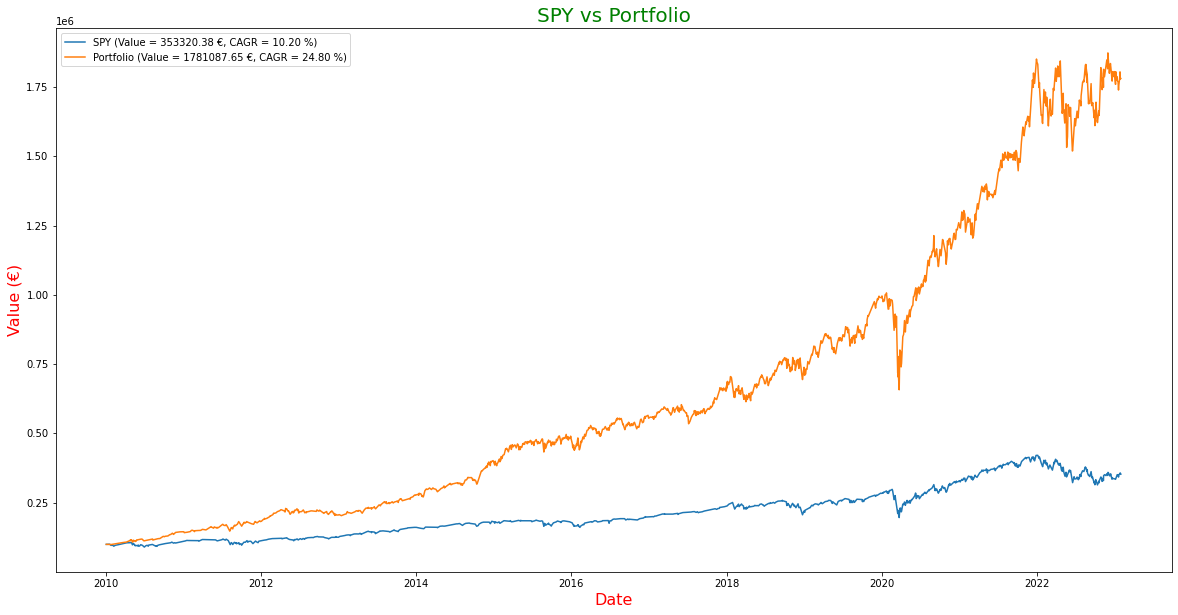

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(df1.index, df1["SPY"], label=f'SPY (Value = {spy_max:.2f} €, CAGR = {spy_cagr:.2f} %)')
plt.plot(df1.index, df1["Portfolio"], label=f'Portfolio (Value = {portfolio_max:.2f} €, CAGR = {portfolio_cagr:.2f} %)')
plt.xlabel('Date', size=16, color='red')  # Add an x-label to the axes.
plt.ylabel('Value (€)', size=16, color='red')  # Add a y-label to the axes.
plt.title("SPY vs Portfolio", size=20, color='green')  # Add a title to the axes.
plt.legend()
plt.show();